# Hysteresis
    Taylor Rubalcava

In [15]:
import numpy as np
from matplotlib import pyplot as plt, animation
from scipy.optimize import newton                            
from scipy.integrate import solve_ivp

In [16]:
def embedding_alg(lams, guess, F):
    xs = list()
    for lam in lams:
        try:
            # Solve for x_value making F(x_value, lam) = 0.
            x_value = newton(F, guess, args=(lam,), tol=1e-7)
            # Record the solution and update guess for the next iteration.
            xs.append(x_value)
            guess = x_value
        except RuntimeError:
            # If Newton's method fails, return a truncated list of parameters
            # with the corresponding x values.
            return lams[: len(xs)], xs
    # Return the list of parameters and the corresponding x values.
    return lams, xs

Using the natural embedding algorithm to create a bifurcation diagram for the differential equation

$x = λx − x^3$

This type of bifurcation is called a pitchfork bifurcation (you should see a pitchfork in your
diagram)

/var/folders/lr/851f4nld2ws1hc6311gxkzdw0000gn/T/ipykernel_34743/4250388604.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k," (-> color='k'). The keyword argument will take precedence.
  plt.plot(lams2, xs2, 'k,', color='b')
/var/folders/lr/851f4nld2ws1hc6311gxkzdw0000gn/T/ipykernel_34743/4250388604.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k," (-> color='k'). The keyword argument will take precedence.
  plt.plot(lams3, xs3, 'k,', color='orange')
/var/folders/lr/851f4nld2ws1hc6311gxkzdw0000gn/T/ipykernel_34743/4250388604.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k," (-> color='k'). The keyword argument will take precedence.
  plt.plot(lams, xs, 'k,', color='g')


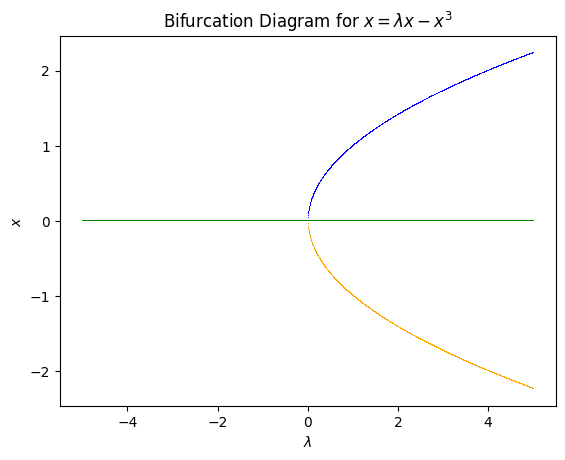

In [17]:
# Define the function F(x, lam) = lambda*x - x^3.
def F(x, lam):
    return lam*x - x**3

# To Create the bifurcation diagram, we will iterate over a range of lambda values several times for different parameters and functions falls
# in order to see all of the curves in the bifurcation diagram.
lams = np.linspace(5, -5, 3000)
# Use the embedding algorithm to find the bifurcation diagram.
lams, xs = embedding_alg(lams, 0, F)
lams2, xs2 = embedding_alg(lams, 5, F)
lams3, xs3 = embedding_alg(lams, -5, F)
# Plot the bifurcation diagram.
plt.plot(lams2, xs2, 'k,', color='b')
plt.plot(lams3, xs3, 'k,', color='orange')
plt.plot(lams, xs, 'k,', color='g')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$x$')
plt.title(r'Bifurcation Diagram for $x = \lambda x - x^3$')
plt.show()


Find the trajectory of $x' = \lambda x-x^3,$
using the points 

$(\lambda, x_0)\in \left\{\left(\frac{1}{2},\frac{1}{2}\right), \left(\frac{1}{2},\frac{-1}{2}\right), \left(\frac{-1}{2},\frac{1}{2}\right), \left(\frac{-1}{2},\frac{-1}{2}\right) \right\}. $

and the initial condition $x(0)=x_0$ using solve_ivp.
Be sure to include a legend.

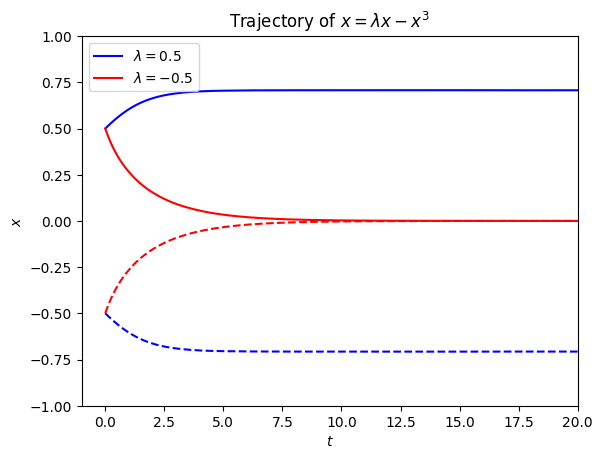

In [18]:
# Plotting the trajectory of the system for a given lambda value.
# Define the function F(x, lam) = lambda*x - x^3.
def F(t, x, lam):
    return lam*x - x**3

# Define the time range for the trajectory.
t_span = (0, 20)
t = np.linspace(*t_span, 1000)

# Define the initial condition for the trajectory and the lambda value.
x0 = [.5, -.5, .5, -.5]
lam = [.5,.5,-.5,-.5]

# Solve the ODE for the trajectory for each x0 and lambda value pair.
i = 0
sol = solve_ivp(F, t_span, [x0[i]], args=(lam[i],), dense_output=True)
x = sol.sol(t)
plt.plot(t, x[0], label=fr'$\lambda = {x0[i]}$', color='b')

i = 1
sol = solve_ivp(F, t_span, [x0[i]], args=(lam[i],), dense_output=True)
x = sol.sol(t)
plt.plot(t, x[0], linestyle='--', color='b')

i = 2
sol = solve_ivp(F, t_span, [x0[i]], args=(lam[i],), dense_output=True)
x = sol.sol(t)
plt.plot(t, x[0], label=fr'$\lambda = -{x0[i]}$', color='r')

i = 3
sol = solve_ivp(F, t_span, [x0[i]], args=(lam[i],), dense_output=True)
x = sol.sol(t)
plt.plot(t, x[0], linestyle='--', color='r')

# Setting the y limits to be 1 and -1, and x lim to be 0 and 20
plt.ylim(-1, 1)
plt.xlim(-1, 20)
# Plot the trajectory of the system with the given lambda value.
plt.xlabel(r'$t$')
plt.ylabel(r'$x$')
plt.title(r'Trajectory of $x = \lambda x - x^3$')
plt.legend()
plt.show()



Reproducing the bifurcation diagram for the differential equation

$\frac{dx}{dτ} = rx(1 − x/k) −\frac{x^2}{1 + x^2}$,

where $r = 0.56$.
Be sure to include a legend.

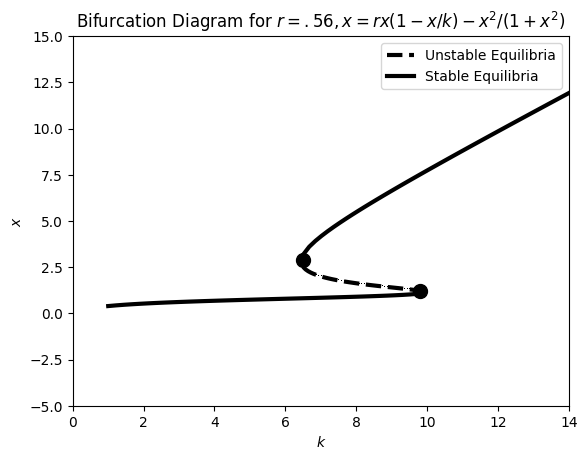

In [19]:
# Plotting the bifurcation diagram for budworm population model
# Define the function F(x, r, k) = r*x*(1 - x/k) - x^2 / (1 + x^2), where r is fixed at .56.
def F(x, k):
    return (0.56)*x*(1 - x/k) - x**2 / (1 + x**2)

# Define the range of k values for the bifurcation diagram.
ks = np.linspace(6.5, 10, 50) # Middle
ks2 = np.linspace(1, 12, 50) # Bottom
ks3 = np.linspace(6.5, 15, 50) # Top

# Use the embedding algorithm to find the bifurcation diagram.
ks, xs = embedding_alg(ks, 2.5, F)
ks2, xs2 = embedding_alg(ks2, 6, F)
ks3, xs3 = embedding_alg(ks3, 4, F)

# Setting the x lims to 0 and 14 and the y lims to -5 and 15
plt.xlim(0, 14)
plt.ylim(-5, 15)

# Adding large 'dots' at (10, 0) and (6.5, 3)
plt.scatter(9.8, 1.2, color='k', s=100)
plt.scatter(6.5, 2.9, color='k', s=100)

# Plot the bifurcation diagram.
plt.plot(ks, xs, '--k,', linewidth=3, label='Unstable Equilibria')
plt.plot(ks2, xs2, '-k,', linewidth=3, label='Stable Equilibria')
plt.plot(ks3, xs3, '-k,', linewidth=3)
plt.xlabel(r'$k$')
plt.ylabel(r'$x$')
plt.title(r'Bifurcation Diagram for $r = .56, x = r x (1 - x/k) - x^2 / (1 + x^2)$')
plt.legend()
plt.show()

Using the time-dependent carrying-capacity

$k(t) = \begin{cases}
  8  & t \in [0,60) \\
  12  & t \in [60,150) \\
  8 & t \in [150,220) \\
  6 & t \in [220,300) \\
\end{cases},$

solve the IVP

$\frac{dx}{dτ} = rx(1 − x/k(t)) −\frac{x^2}{1 + x^2}$,

where $r = 0.56$ and $x(0)=x_0=0.3.$
Be sure to include a legend.

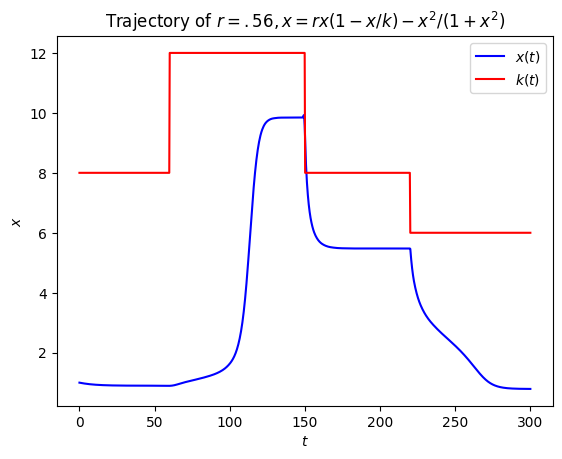

In [20]:
# Plotting the trajectory of the system for a given k value.
# Define the function F(x, k) = r*x*(1 - x/k) - x^2 / (1 + x^2), where r is fixed at .56.
def k(t):
    if t < 60:
        return 8
    elif t < 150:
        return 12
    elif t < 220:
        return 8
    else:
        return 6

def F(t, x):
    return (0.56)*x*(1 - x/(k(t))) - x**2 / (1 + x**2)

# Solving and plotting the state-space trajectory of the system.
# Also plotting the k(t) function on the same graph.
t_span = (0, 300)
t = np.linspace(*t_span, 1000)
sol = solve_ivp(F, t_span, [1], dense_output=True)
x = sol.sol(t)
plt.plot(t, x[0], label=r'$x(t)$', color='b')
k_vals = [k(t_val) for t_val in t]
plt.plot(t, k_vals, label=r'$k(t)$', color='r')
plt.xlabel(r'$t$')
plt.ylabel(r'$x$')
plt.title(r'Trajectory of $r = .56, x = r x (1 - x/k) - x^2 / (1 + x^2)$')
plt.legend()
plt.show()


/var/folders/lr/851f4nld2ws1hc6311gxkzdw0000gn/T/ipykernel_34743/3376007390.py:51: RuntimeWarning: invalid value encountered in sqrt
  r = np.sqrt(u_val)
/var/folders/lr/851f4nld2ws1hc6311gxkzdw0000gn/T/ipykernel_34743/3376007390.py:61: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='lower right')


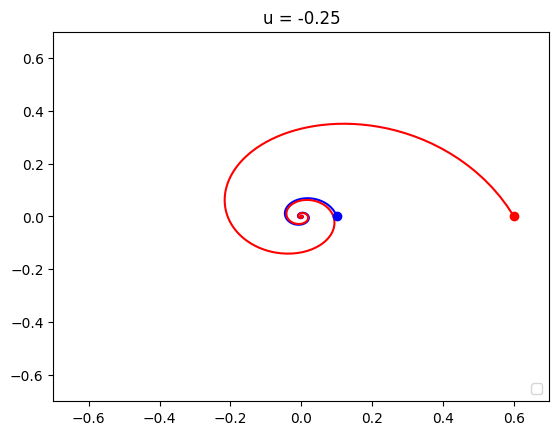

In [21]:
xlim = -0.7, 0.7
ylim = -0.7, 0.7
intial_point_state1 = [0.1, 0]
intial_point_state2 = [.6, 0]
u = np.linspace(-.25, .25, 251)
omega = 1
b = 1
t_span = (0, 16*(np.pi))

# The System of ODEs if r' = u * r - r^3 and delta' = omega + b*r^2
def F(t, state, u, omega, b):
    r, delta = state
    drdt = u*r - r**3
    ddeltadt = omega + b*(r**2)
    return [drdt, ddeltadt]

# Creating an animation of the system of ODEs showing how the two trajectories evolve as u changes.
# Creating the figure
fig = plt.figure()

# Creating the axes
ax = fig.add_subplot(111, autoscale_on=False, xlim=xlim, ylim=ylim)

# Creating the time points for the trajectory
t = np.linspace(*t_span, 1000)

# Creating the update function for the animation
def update(u_val):
    # Clearing the previous lines
    ax.clear()
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    # Solving the ODE for the first initial condition
    sol = solve_ivp(F, t_span, intial_point_state1, args=(u_val, omega, b), dense_output=True)
    r, delta = sol.sol(t)

    # Solving the ODE for the second initial condition
    sol = solve_ivp(F, t_span, intial_point_state2, args=(u_val, omega, b), dense_output=True)
    r2, delta2 = sol.sol(t)

    # Plotting the two trajectories
    ax.plot(r * np.cos(delta), r * np.sin(delta), color='b')
    ax.plot(r2 * np.cos(delta2), r2 * np.sin(delta2), color='r')

    # Adding a point at the starts of the trajectories
    ax.plot(r[0] * np.cos(delta[0]), r[0] * np.sin(delta[0]), 'bo')
    ax.plot(r2[0] * np.cos(delta2[0]), r2[0] * np.sin(delta2[0]), 'ro')

    # Adding the limit cycle at r = sqrt(u)
    theta = np.linspace(0, 2*np.pi, 1000)
    r = np.sqrt(u_val)
    ax.plot(r * np.cos(theta), r * np.sin(theta), 'k--')
    
    # Adding the title
    ax.set_title(f"u = {u_val}")

    # Adding a legend
    ax.legend(["inside limit cycle", "outside limit cycle", "Limit Cycle"])

    # Locking the legend in the bottom right corner
    ax.legend(loc='lower right')

    return ax

# Creating the animation
ani = animation.FuncAnimation(fig, update, frames=u, interval = 33.5)
animation.writer = animation.writers["ffmpeg"]
ani.save("./Media/hopf.mp4")

<video src="./Media/hopf.mp4" controls> 